In [66]:
import pandas as pd

taf = pd.read_csv("/Users/harmonialeo/Downloads/taf_se_quantiled/summarise.csv")
taf.head()

,Unnamed: 0,Exp name,File name,Time stamp,Map,Map 50,Map 75,Map small,Map medium,Map large,Infer time
0,0,taf_se_quantiled_best,17-10-12_16-51-41_549500000_609500000,849999.0,0.80000,1.00000,1.0,-1.0,0.8,-1.0,1.010494
1,1,taf_se_quantiled_best,17-10-12_16-51-41_549500000_609500000,1849999.0,0.80000,1.00000,1.0,-1.0,0.8,-1.0,0.014788
2,2,taf_se_quantiled_best,17-10-12_16-51-41_549500000_609500000,2849999.0,0.80000,1.00000,1.0,-1.0,0.8,-1.0,0.009570
3,3,taf_se_quantiled_best,17-10-12_16-51-41_549500000_609500000,3849999.0,0.10099,0.50495,0.0,0.0,0.2,-1.0,0.010036
4,4,taf_se_quantiled_best,17-10-12_16-51-41_549500000_609500000,4849999.0,0.00000,0.00000,0.0,0.0,0.0,-1.0,0.009459


In [67]:
basic = pd.read_csv("/Users/harmonialeo/Downloads/basic/summarise.csv")
basic.head()

,Unnamed: 0,Exp name,File name,Time stamp,Map,Map 50,Map 75,Map small,Map medium,Map large,Infer time
0,0,basic_newlr,17-10-06_13-18-33_244500000_304500000,749999.0,0.966337,1.0,1.0,0.9,1.000000,1.0,2.470572
1,1,basic_newlr,17-10-06_13-18-33_244500000_304500000,1749999.0,0.822772,1.0,1.0,-1.0,0.822772,-1.0,0.012110
2,2,basic_newlr,17-10-06_13-18-33_244500000_304500000,2749999.0,0.800000,1.0,1.0,0.8,-1.000000,-1.0,0.009104
3,3,basic_newlr,17-10-06_13-18-33_244500000_304500000,3749999.0,0.000000,0.0,0.0,0.0,-1.000000,-1.0,0.008955
4,4,basic_newlr,17-10-06_13-18-33_244500000_304500000,4749999.0,0.850495,1.0,1.0,0.8,0.900000,-1.0,0.008486


In [68]:
den_train = pd.read_csv("/Users/harmonialeo/Downloads/gen2_train_density.csv")
den_train.head()

,Unnamed: 0,File name,Time stamp,Density,Density negative,Density positive,Density effective
0,0,17-10-18_14-31-23_1037500000_1097500000,749999,0.095888,0.066941,0.074808,0.000000
1,1,17-10-18_14-31-23_1037500000_1097500000,1749999,0.139583,0.107429,0.110499,0.464193
2,2,17-10-18_14-31-23_1037500000_1097500000,2749999,0.079921,0.058279,0.063967,0.215168
3,3,17-10-18_14-31-23_1037500000_1097500000,3749999,0.065173,0.049986,0.053139,0.643131
4,4,17-10-18_14-31-23_1037500000_1097500000,4749999,0.054345,0.040186,0.046765,0.682292


In [69]:
den_val = pd.read_csv("/Users/harmonialeo/Downloads/gen2_val_density.csv")
den_val.head()

,Unnamed: 0,File name,Time stamp,Density,Density negative,Density positive,Density effective
0,0,17-04-13_19-17-27_2928500000_2988500000,3099999,0.065611,0.035828,0.038720,0.498433
1,1,17-04-13_19-17-27_2928500000_2988500000,33099999,0.084690,0.058553,0.049328,0.550794
2,2,17-04-13_19-17-27_2928500000_2988500000,34099999,0.075137,0.048766,0.042969,0.522491
3,3,17-04-13_19-17-27_2928500000_2988500000,35599999,0.065461,0.043366,0.032579,0.187500
4,4,17-04-13_19-17-27_2928500000_2988500000,36099999,0.064021,0.043065,0.033964,0.100733


In [70]:
den_test = pd.read_csv("/Users/harmonialeo/Downloads/gen2_test_density.csv")
den_test.head()

,Unnamed: 0,File name,Time stamp,Density,Density negative,Density positive,Density effective
0,0,17-10-12_16-51-41_549500000_609500000,849999,0.120477,0.087240,0.093586,0.271280
1,1,17-10-12_16-51-41_549500000_609500000,1849999,0.104879,0.073808,0.083183,0.337622
2,2,17-10-12_16-51-41_549500000_609500000,2849999,0.091954,0.061541,0.067421,0.175610
3,3,17-10-12_16-51-41_549500000_609500000,3849999,0.232470,0.173342,0.166913,0.587477
4,4,17-10-12_16-51-41_549500000_609500000,4849999,0.301604,0.228509,0.227728,0.693189


In [75]:
rps_time = pd.read_csv("/Users/harmonialeo/Downloads/gen2_generate_time.csv")
rps_time.head()

,Unnamed: 0,File name,Time stamp,Generate volume time,Generate taf time
0,0,17-10-12_16-51-41_549500000_609500000,849999,0.001451,0.002684
1,1,17-10-12_16-51-41_549500000_609500000,1849999,0.001150,0.002442
2,2,17-10-12_16-51-41_549500000_609500000,2849999,0.000903,0.002003
3,3,17-10-12_16-51-41_549500000_609500000,3849999,0.001079,0.002352
4,4,17-10-12_16-51-41_549500000_609500000,4849999,0.001048,0.002248


In [ ]:
test_

In [82]:
taf = taf.merge(rps_time,left_on=["File name","Time stamp"],right_on=["File name","Time stamp"])
basic = basic.merge(rps_time,left_on=["File name","Time stamp"],right_on=["File name","Time stamp"])

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

In [86]:
basic["Run time"] = basic["Infer time"] + basic["Generate volume time"]

In [95]:
basic_Run_time = basic["Run time"][basic["Run time"]!=basic["Run time"].max()]

In [96]:
basic_Run_time.min()

0.008463144302368001

In [97]:
basic_Run_time.max()

0.0192687511444091

In [98]:
basic_Run_time.mean()

0.009345022710808448

In [99]:
taf["Run time"] = taf["Infer time"] + taf["Generate taf time"]

In [100]:
taf_Run_time = taf["Run time"][taf["Run time"]!=taf["Run time"].max()]

In [101]:
taf_Run_time.max()

0.030833721160888502

In [102]:
taf_Run_time.min()

0.0102362632751464

In [103]:
taf_Run_time.mean()

0.01224184102386423

In [104]:
taf = taf.merge(den_test,left_on=["File name","Time stamp"],right_on=["File name","Time stamp"])
basic = basic.merge(den_test,left_on=["File name","Time stamp"],right_on=["File name","Time stamp"])

<AxesSubplot:xlabel='Density', ylabel='Run time'>

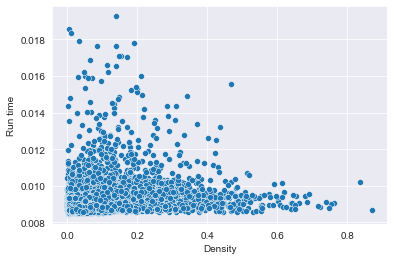

In [105]:
basic_density = basic["Density"][basic["Run time"]!=basic["Run time"].max()]
sns.scatterplot(x=basic_density,y=basic_Run_time)

<AxesSubplot:xlabel='Density', ylabel='Run time'>

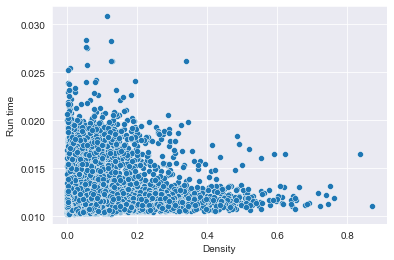

In [106]:
taf_density = taf["Density"][taf["Run time"]!=taf["Run time"].max()]
sns.scatterplot(x=taf_density,y=taf_Run_time)

In [ ]:
sns.histplot(den_all["Density"])

In [72]:
den_all = den_train.append(den_val).append(den_test)

No handles with labels found to put in legend.


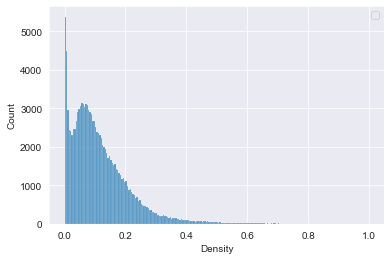

In [73]:
sns.histplot(den_all["Density"])
plt.legend()

No handles with labels found to put in legend.


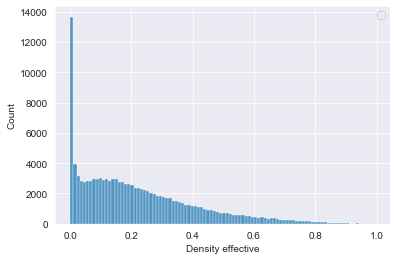

In [74]:
sns.histplot(den_all["Density effective"])
plt.legend()

In [53]:
from sklearn.mixture import GaussianMixture

clf = GaussianMixture(3,random_state=0).fit(den_all[["Density effective"]].append(-den_all[["Density effective"]]))
labels = clf.predict(den_test[["Density effective"]])

In [54]:
clf.means_

array([[-0.13794366],
       [ 0.00017431],
       [ 0.14112953]])

In [64]:
import numpy as np

np.sqrt(clf.covariances_)

array([[[0.13509754]],

       [[0.06060911]],

       [[0.13442986]]])

In [56]:
type0max = (clf.means_[2,0] - np.sqrt(clf.covariances_[2,0]))[0]

In [57]:
type0min = (clf.means_[1,0] + np.sqrt(clf.covariances_[1,0]))[0]

In [58]:
den_test["type"] = labels

In [59]:
den_test["type"] = np.where((den_test["Density effective"] > type0min) & (den_test["Density effective"] < type0max), 0, den_test["type"])

<AxesSubplot:>

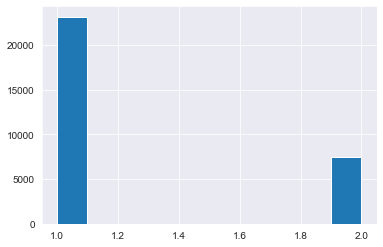

In [60]:
den_test["type"].hist()

<AxesSubplot:xlabel='Density negative', ylabel='Density positive'>

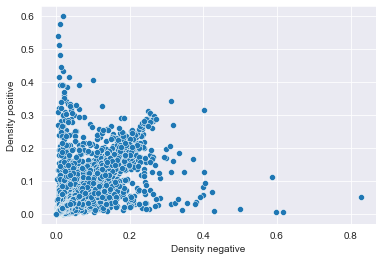

In [61]:
sns.scatterplot(x="Density negative",y="Density positive",data=den_all)

<AxesSubplot:xlabel='Density diff', ylabel='Density'>

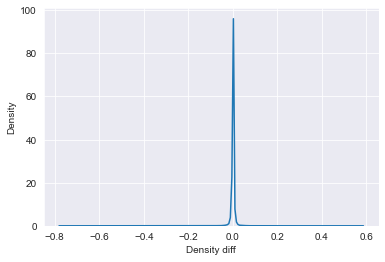

In [62]:
den_all["Density diff"] = den_all["Density positive"] - den_all["Density negative"]
sns.kdeplot(den_all["Density diff"])

In [63]:
den_all["Density diff"].mean()

0.0003437703083821454

In [65]:
den_all["Density diff"].std()

0.013091685937736125

In [13]:
joined = taf.join(basic,lsuffix='_taf', rsuffix='_basic')

In [15]:
joined.head()

,Unnamed: 0_taf,Exp name_taf,File name_taf,Time stamp_taf,Map_taf,Map medium_taf,Map large_taf,Density_taf,Density effective_taf,Unnamed: 0_basic,Exp name_basic,File name_basic,Time stamp_basic,Map_basic,Map medium_basic,Map large_basic,Density_basic,Density effective_basic
0,0,taf_newlr,17-10-12_16-51-41_549500000_609500000,849999.0,0.800000,0.8,-1.0,0.345898,0.590567,0,basic_newlr,17-10-06_13-18-33_244500000_304500000,749999.0,0.966337,1.000000,1.0,0.259265,0.575373
1,1,taf_newlr,17-10-12_16-51-41_549500000_609500000,1849999.0,0.800000,0.8,-1.0,0.344983,0.746007,1,basic_newlr,17-10-06_13-18-33_244500000_304500000,1749999.0,0.822772,0.822772,-1.0,0.172083,0.421150
2,2,taf_newlr,17-10-12_16-51-41_549500000_609500000,2849999.0,0.800000,0.8,-1.0,0.395068,0.521885,2,basic_newlr,17-10-06_13-18-33_244500000_304500000,2749999.0,0.800000,-1.000000,-1.0,0.163586,0.468446
3,3,taf_newlr,17-10-12_16-51-41_549500000_609500000,3849999.0,0.151485,0.3,-1.0,0.421948,0.812989,3,basic_newlr,17-10-06_13-18-33_244500000_304500000,3749999.0,0.000000,-1.000000,-1.0,0.144031,0.350906
4,4,taf_newlr,17-10-12_16-51-41_549500000_609500000,4849999.0,0.000000,0.0,-1.0,0.401514,0.807414,4,basic_newlr,17-10-06_13-18-33_244500000_304500000,4749999.0,0.850495,0.900000,-1.0,0.204968,0.484999


/Users/harmonialeo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Map_taf', ylabel='Map_basic'>

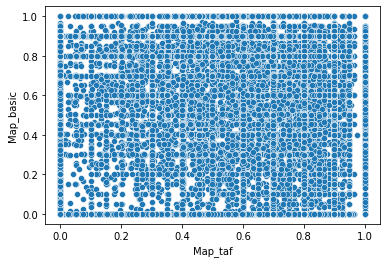

In [14]:
import seaborn as sns

sns.scatterplot("Map_taf","Map_basic",data=joined)

<AxesSubplot:ylabel='Density'>

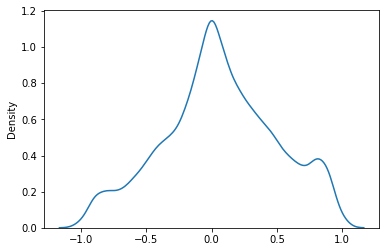

In [35]:
sns.kdeplot(joined["Map_taf"]-joined["Map_basic"])

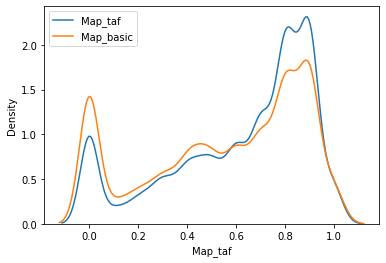

In [21]:
import matplotlib.pyplot as plt

sns.kdeplot(joined["Map_taf"],label="Map_taf")
sns.kdeplot(joined["Map_basic"],label="Map_basic")
plt.legend()

<AxesSubplot:xlabel='Density effective_basic', ylabel='Count'>

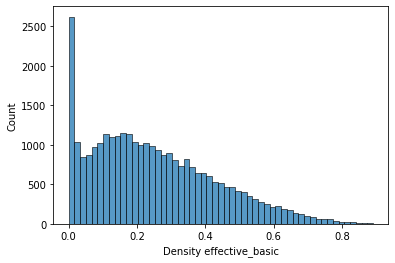

In [23]:
sns.histplot(joined["Density effective_basic"])

<AxesSubplot:xlabel='Density_basic', ylabel='Count'>

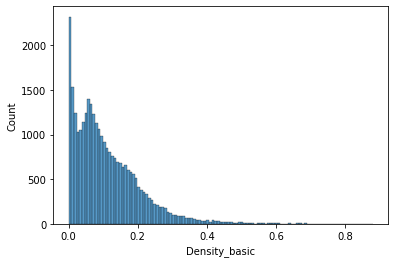

In [24]:
sns.histplot(joined["Density_basic"])

In [26]:
import numpy as np

joined["situation"] = np.where(joined["Density effective_basic"]>0.03, 1, 3)

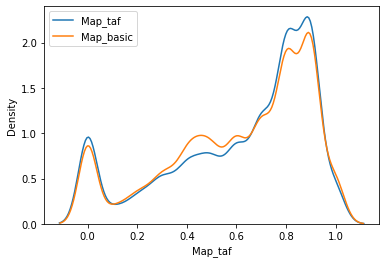

In [34]:
import matplotlib.pyplot as plt

sns.kdeplot(joined[joined["situation"]==1]["Map_taf"],label="Map_taf")
sns.kdeplot(joined[joined["situation"]==1]["Map_basic"],label="Map_basic")
plt.legend()

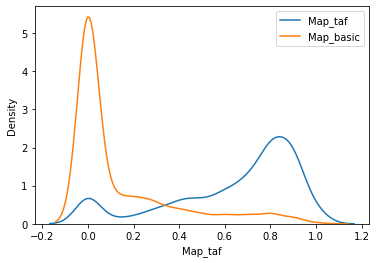

In [28]:
sns.kdeplot(joined[joined["situation"]==3]["Map_taf"],label="Map_taf")
sns.kdeplot(joined[joined["situation"]==3]["Map_basic"],label="Map_basic")
plt.legend()

In [29]:
joined[joined["situation"]==1]["Map_taf"].mean()

0.6176369378222983

In [30]:
joined[joined["situation"]==1]["Map_basic"].mean()

0.6100322935023785

In [31]:
joined["situation"] = np.where(joined["Density_basic"]>0.8, 5, joined["situation"])

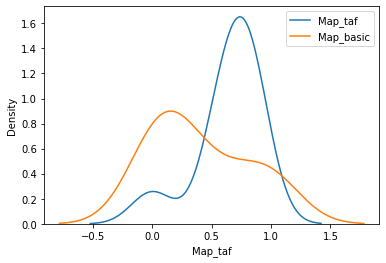

In [32]:
sns.kdeplot(joined[joined["situation"]==5]["Map_taf"],label="Map_taf")
sns.kdeplot(joined[joined["situation"]==5]["Map_basic"],label="Map_basic")
plt.legend()

<AxesSubplot:xlabel='Density', ylabel='Density'>

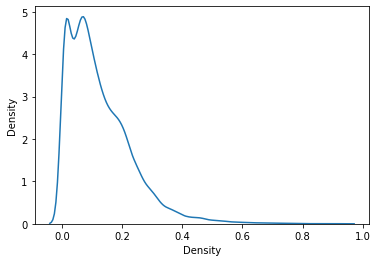

In [11]:
sns.kdeplot(no2["Density"])

In [24]:
import torch.nn.functional as F
import torch

w = torch.rand((50,))

b = torch.rand((50,))
x = torch.rand((50,))
y = torch.rand((50,))

w.requires_grad_()	#设定参数张量w需要梯度
mse=F.mse_loss(y,x*w+b)	#构造函数，这里构造MSE损失函数。第一个参数是实际值，第二个参数是预测值
#grads=torch.autograd.grad(mse,[w])	#第一个参数为待求梯度的函数，第二个参数为一个列表，里面是需要梯度的张量
#返回一个梯度张量的列表

mse.backward()	#反向传播，直接将梯度附加到作为函数参数的所有需要梯度的张量上
w.grad	#查看需要梯度的张量上附加的梯度

#进行一次自动求导后，计算图信息会被清除，再次求导会报错。在调用grad和backward时设定retain_graph参数为True以保留计算图信息

tensor([ 3.1432e-02,  4.6411e-03,  4.3153e-03, -3.9886e-03,  1.0648e-02,
         3.7836e-02,  7.8999e-03,  3.5276e-03,  8.1017e-03,  2.8821e-02,
         1.1570e-05,  1.1392e-03, -1.6656e-03,  4.3749e-04,  1.0851e-02,
         1.3556e-02,  7.9702e-03,  1.4270e-02,  3.4594e-03, -1.7526e-04,
         3.1222e-02,  2.0484e-02, -1.4020e-03,  7.9378e-03,  1.0381e-02,
        -3.2662e-05, -2.5660e-03, -5.4967e-03, -7.9514e-03, -8.4727e-03,
        -3.9756e-05, -1.2954e-04,  1.3488e-02,  1.3145e-02,  7.2587e-03,
         8.2422e-04, -3.4455e-03,  2.0550e-02, -1.6969e-03, -4.0541e-03,
        -1.8687e-03,  3.8898e-03,  9.8480e-03,  2.1059e-02,  1.8920e-03,
         1.9117e-03,  1.4408e-02,  3.5766e-02, -3.5959e-04,  1.4639e-03])

In [36]:
w1 = torch.rand((50,))

b1 = torch.rand((50,))
x1 = torch.rand((50,))

w2 = torch.rand((50,))

b2 = torch.rand((50,))
x2 = torch.rand((50,))

w1.requires_grad_()	#设定参数张量w需要梯度
b1.requires_grad_()
w2.requires_grad_()
b2.requires_grad_()

x1_after = x1*w1+b1
x2_after = x2*w2+b2

x1_after = torch.where(x1_after<x2_after,x1_after,torch.zeros_like(x1_after))

y = torch.rand((50,))

mse=F.mse_loss(y,x1_after)	#构造函数，这里构造MSE损失函数。第一个参数是实际值，第二个参数是预测值
#grads=torch.autograd.grad(mse,[w])	#第一个参数为待求梯度的函数，第二个参数为一个列表，里面是需要梯度的张量
#返回一个梯度张量的列表

mse.backward()	#反向传播，直接将梯度附加到作为函数参数的所有需要梯度的张量上
w2.grad	#查看需要梯度的张量上附加的梯度

In [29]:
w2.grad

In [14]:
import torch

def f(x,r1,r2):
    return torch.where(x <= 0.5, r1 , r2)

x = torch.autograd.Variable(torch.rand((50,)), requires_grad=True)
r1 = torch.autograd.Variable(torch.rand((50,)), requires_grad=True)
r2 = torch.autograd.Variable(torch.rand((50,)), requires_grad=True)
torch.autograd.grad(f(x, r1, r2), x)

RuntimeError: grad can be implicitly created only for scalar outputs

In [15]:
import numpy as np

x = np.array([320, 312, 313, 302],dtype=np.uint32)
y = np.array([0, 219, 217, 243],dtype=np.uint32)
c = np.array([3, 5, 4, 0],dtype=np.uint32)
p = np.array([0, 1, 1, 0],dtype=np.uint32)
ecd = x + np.left_shift(y, 9) + np.left_shift(c, 17) + np.left_shift(p, 21)
ecd

array([ 393536, 2864952, 2732857,  124718], dtype=uint32)

In [16]:
np.bitwise_and(ecd, 511)

array([320, 312, 313, 302], dtype=uint32)

In [19]:
np.right_shift(np.bitwise_and(ecd, 130560), 9)

array([  0, 219, 217, 243], dtype=uint32)

In [20]:
np.right_shift(np.bitwise_and(ecd, 1966080), 17)

array([3, 5, 4, 0], dtype=uint32)

In [21]:
np.right_shift(np.bitwise_and(ecd, 2097152), 21)

array([0, 1, 1, 0], dtype=uint32)

In [23]:
np.left_shift(p, 9)

array([  0, 512, 512,   0], dtype=uint32)